<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Categorical features Encoding ....
<a class="anchor" id="1"></a> 

<img src="https://i.ibb.co/dt2WbnJ/data-Srt-Enconding.jpg" width=400></img>
- Data loading 
- Data Encoding
- Data Cleaning
- feature importance 

- ترميز البينات بالطريقة التي تعرضنا اليها سابقا  افرزت علاقة تفاضلية فيما بين البيانات


In [21]:
#تحميل البيانات 
import pandas as pd
# read_csv(..., nrows=999999)
df= pd.read_csv("../data/HousePrice3.csv", index_col=0)


 - يتعرض الترميز الجديد إلى تلك الخصائص التي لا تفاضل فيما بين قيم الترميز فيها 

In [22]:
df.select_dtypes(exclude="number").columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [23]:
df.sample(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
1239,20,RL,64.0,9037,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,2007,WD,Normal,265900,2960,33,2.0,-2.449294e-16,1.000000e+00
1156,80,RL,85.0,9350,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,2008,WD,Normal,179900,2484,188,2.5,-8.660254e-01,5.000000e-01
86,60,RL,122.0,11911,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,2009,WD,Normal,174000,2244,38,2.5,1.000000e+00,6.123234e-17


## حذف الخصائص الغير مؤثرة في نتيجة التنبؤ من خلال فحص نسب تواجد البيانات فيها

### keep just   features having most impact on teh target

In [24]:
#  قائمة الخصائص التي تتميز بأعلى نسبة غياب في بياناتها
miss_val=(df.isna().sum()/df.shape[0]).sort_values()
miss_val.nlargest(10)
#miss_val.nlargest(7).index
# df[miss_val.nlargest(7).index]

PoolQC          0.995876
MiscFeature     0.963574
Alley           0.937457
Fence           0.806873
MasVnrType      0.598625
FireplaceQu     0.473540
LotFrontage     0.177320
GarageType      0.055670
GarageFinish    0.055670
GarageCond      0.055670
dtype: float64

In [5]:
df.shape

(1455, 72)

In [25]:
# حذف قائمة أكثر 6  خصائص ذات بيانات محذوفة   
df.drop( miss_val.nlargest(6).index, axis=1 ,   inplace=True )

In [26]:
df.shape

(1455, 66)

In [27]:
# لنلقي نظرة  على البيانات التصنيفية 
for col in df.select_dtypes(exclude="number").columns:
  print(f" {col:-<50} :   {df[col].unique()} & Mising Values |({df[col].isna().sum()/df.shape[0]:.3}) " )

 MSZoning------------------------------------------ :   ['RL' 'RM' 'C (all)' 'FV' 'RH'] & Mising Values |(0.0) 
 Street-------------------------------------------- :   ['Pave' 'Grvl'] & Mising Values |(0.0) 
 LotShape------------------------------------------ :   ['Reg' 'IR1' 'IR2' 'IR3'] & Mising Values |(0.0) 
 LandContour--------------------------------------- :   ['Lvl' 'Bnk' 'Low' 'HLS'] & Mising Values |(0.0) 
 Utilities----------------------------------------- :   ['AllPub' 'NoSeWa'] & Mising Values |(0.0) 
 LotConfig----------------------------------------- :   ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] & Mising Values |(0.0) 
 LandSlope----------------------------------------- :   ['Gtl' 'Mod' 'Sev'] & Mising Values |(0.0) 
 Neighborhood-------------------------------------- :   ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkV

In [28]:
(df.isna().sum()/df.shape[0]).sort_values().nlargest(5)

LotFrontage     0.17732
GarageType      0.05567
GarageFinish    0.05567
GarageCond      0.05567
GarageQual      0.05567
dtype: float64

In [29]:
df.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [10]:
# تصفير قيم ناقصة 
import numpy as np
pd.Series([1, np.nan, 2, 3 ])


0    1.0
1    NaN
2    2.0
3    3.0
dtype: float64

In [11]:
pd.Series([1, np.nan, 2, 3 ]).fillna(value=0 )

0    1.0
1    0.0
2    2.0
3    3.0
dtype: float64

In [30]:
df[df.BsmtQual.isna()][["BsmtQual"]].head()

,BsmtQual
17,NaN
39,NaN
90,NaN
102,NaN
156,NaN


In [53]:
df.select_dtypes(exclude="number").columns

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [58]:
#   nan  يمكن تصفير  جميع القيم  
cat_features= ["LotShape", "LandSlope", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure" , "BsmtFinType1" , "BsmtFinType2", 
           "HeatingQC", "KitchenQual", "Functional", "GarageFinish" ,"GarageQual","GarageCond","PavedDrive" , "CentralAir" ]

In [59]:
for col in cat_features:
  print(f" {col:-<20} :   {df[col].unique()}" )

 LotShape------------ :   [nan]
 LandSlope----------- :   [nan]
 ExterQual----------- :   [nan]
 ExterCond----------- :   [2 3 1 0 4]
 BsmtQual------------ :   [ 2.  1.  3. nan  0.]
 BsmtCond------------ :   [ 2.  3. nan  1.  0.]
 BsmtExposure-------- :   [ 0.  3.  1.  2. nan]
 BsmtFinType1-------- :   [ 5.  4.  0.  2.  3. nan  1.]
 BsmtFinType2-------- :   [ 1.  3. nan  4.  2.  0.  5.]
 HeatingQC----------- :   [4 3 2 1 0]
 KitchenQual--------- :   [2 1 3 0]
 Functional---------- :   [1 6 3 5 4 2 0]
 GarageFinish-------- :   [ 1.  0.  2. nan]
 GarageQual---------- :   [ 2.  1.  3. nan  4.  0.]
 GarageCond---------- :   [ 2.  1. nan  3.  0.  4.]
 PavedDrive---------- :   [2 0 1]
 CentralAir---------- :   [1 0]


In [60]:
len(map_dict), len(cat_features )

(17, 17)

In [62]:
import numpy as np 
map_dict=[
          {'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3}, # LotShape
          {'Gtl':2, 'Mod':1 ,'Sev':0}, # LandSlope
          {'Gd':2 ,'TA':1 ,'Ex':3, 'Fa':0} , #ExterQual
        #   {'BrkFace':2,'Stone':3,  'BrkCmn':1, "None":0}, #MasVnrType
          {'TA':2, 'Gd':3, 'Fa':1 ,'Po':0 ,'Ex':4}, #ExterCond
          {'Gd':2 ,'TA':1, 'Ex':3 , 'Fa':0}, #BsmtQual
          {'TA':2, 'Gd':3 ,'Fa':1, 'Po':0}, #BsmtCond
          {'No':0 ,'Gd':3 , 'Mn':1 ,'Av':2}, #BsmtExposure
          {'GLQ':5,  'ALQ':4, 'Unf':0, 'Rec':2 ,'BLQ':3,  'LwQ':1}  ,#BsmtFinType1
          {'GLQ':5,  'ALQ':4 ,'Unf':1 ,'Rec':2 ,'BLQ':3,'LwQ':0}, #BsmtFinType2
          {'Ex':4 ,'Gd':3 ,'TA':2 ,'Fa':1 ,'Po':0}, #HeatingQC
          {'Gd':2,  'TA':1 ,'Ex':3,  'Fa':0}, #KitchenQual
          {'Typ':1,  'Min1':6,  'Maj1':3, 'Min2':5,  'Mod':4,  'Maj2':2,  'Sev':0} , #Functional 
          {'RFn':1 ,'Unf':0 ,'Fin':2}, #GarageFinish
          {'TA':2 ,'Fa':1 ,  'Gd':3, 'Po':0,  'Ex':4}, #GarageQual
          {'TA':2 ,'Fa':1 ,  'Gd':3, 'Po':0,  'Ex':4} , #GarageCond
          {'Y':2 ,'N':0 ,'P':1}, #PavedDrive
          {'Y':1 ,'N':0} #CentralAir
]


for col, mp in zip(cat_features, map_dict):
    #print( col, "  --"  , mp)
    df[col]= df[col].map(mp)
   




In [63]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
0,60,RL,65.0,8450,Pave,NaN,Lvl,AllPub,Inside,NaN,...,0,2008,WD,Normal,208500,2566,61,3.5,8.660254e-01,5.000000e-01
1,20,RL,80.0,9600,Pave,NaN,Lvl,AllPub,FR2,NaN,...,0,2007,WD,Normal,181500,2524,0,2.5,5.000000e-01,-8.660254e-01
2,60,RL,68.0,11250,Pave,NaN,Lvl,AllPub,Inside,NaN,...,0,2008,WD,Normal,223500,2706,42,3.5,-1.000000e+00,-1.836970e-16
3,70,RL,60.0,9550,Pave,NaN,Lvl,AllPub,Corner,NaN,...,0,2006,WD,Abnorml,140000,2473,307,2.0,8.660254e-01,5.000000e-01
4,60,RL,84.0,14260,Pave,NaN,Lvl,AllPub,FR2,NaN,...,0,2008,WD,Normal,250000,3343,84,3.5,-2.449294e-16,1.000000e+00


In [64]:
df[df[cat_features].isna().any(axis=1)].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
0,60,RL,65.0,8450,Pave,NaN,Lvl,AllPub,Inside,NaN,...,0,2008,WD,Normal,208500,2566,61,3.5,8.660254e-01,5.000000e-01
1,20,RL,80.0,9600,Pave,NaN,Lvl,AllPub,FR2,NaN,...,0,2007,WD,Normal,181500,2524,0,2.5,5.000000e-01,-8.660254e-01
2,60,RL,68.0,11250,Pave,NaN,Lvl,AllPub,Inside,NaN,...,0,2008,WD,Normal,223500,2706,42,3.5,-1.000000e+00,-1.836970e-16
3,70,RL,60.0,9550,Pave,NaN,Lvl,AllPub,Corner,NaN,...,0,2006,WD,Abnorml,140000,2473,307,2.0,8.660254e-01,5.000000e-01
4,60,RL,84.0,14260,Pave,NaN,Lvl,AllPub,FR2,NaN,...,0,2008,WD,Normal,250000,3343,84,3.5,-2.449294e-16,1.000000e+00


In [65]:
df.select_dtypes(exclude="number")

,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,Electrical,GarageType,SaleType,SaleCondition
0,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal
1,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,CBlock,GasA,SBrkr,Attchd,WD,Normal
2,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal
3,RL,Pave,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkTil,GasA,SBrkr,Detchd,WD,Abnorml
4,RL,Pave,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Lvl,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal
1456,RL,Pave,Lvl,AllPub,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,CBlock,GasA,SBrkr,Attchd,WD,Normal
1457,RL,Pave,Lvl,AllPub,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,Stone,GasA,SBrkr,Attchd,WD,Normal
1458,RL,Pave,Lvl,AllPub,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,CBlock,GasA,FuseA,Attchd,WD,Normal


In [66]:
df[["YrSold", "YearRemodAdd", "YearBuilt"]].describe().T

,count,mean,std,min,25%,50%,75%,max
YrSold,1455.0,2007.815120,1.329816,2006.0,2007.0,2008.0,2009.0,2010.0
YearRemodAdd,1455.0,1984.848110,20.631492,1950.0,1967.0,1994.0,2004.0,2010.0
YearBuilt,1455.0,1971.224742,30.193365,1872.0,1954.0,1973.0,2000.0,2010.0


In [67]:

df[["YrSold", "YearRemodAdd", "YearBuilt"]].agg(["min", "max"]).T

,min,max
YrSold,2006,2010
YearRemodAdd,1950,2010
YearBuilt,1872,2010


- بعض البنايات قديمة جدا وربما تكون مصنفة كمعمار تاريخي 

In [68]:
# معالجة تاريخ البيع 
# df["YrSold"]= df.YrSold + df.SnMoSold/df.CsMoSold

In [69]:
# معالجة تاريخ التجديد 
df[["YearBuilt", "YearRemodAdd"]].head()

,YearBuilt,YearRemodAdd
0,2003,2003
1,1976,1976
2,2001,2002
3,1915,1970
4,2000,2000


In [70]:
((df.YearBuilt!=df.YearRemodAdd)+0).head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [71]:
# استحداث  خاصية جديدة 
df["Remodeled"]=((df.YearBuilt!=df.YearRemodAdd)+0)

In [72]:

#تحديد عمر العقار 
# all$Age <- as.numeric(all$YrSold)-all$YearRemodAdd

df["Age"]=df.YrSold - df.YearRemodAdd

In [73]:
# هل العقارجديد
df[["YearBuilt", "YrSold", "Age"]].head()

,YearBuilt,YrSold,Age
0,2003,2008,5
1,1976,2007,31
2,2001,2008,6
3,1915,2006,36
4,2000,2008,8


In [74]:
((df.YearBuilt==df.YrSold)+0).head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [75]:
# استحداث  خاصية جديدة 
df["Isnew"]=((df.YrSold==df.YearBuilt)+0)

In [76]:

df[["YrSold", "YearBuilt", "Isnew"]].sample(8)

,YrSold,YearBuilt,Isnew
729,2009,1925,0
905,2010,1954,0
504,2009,1974,0
329,2009,1920,0
1104,2007,1970,0
46,2009,2003,0
236,2010,2004,0
789,2007,1966,0


In [77]:

# التخلص من الخصائص التي تم تحويلها 
df.drop(["YearBuilt", "YrSold", "YearRemodAdd"], axis=1, inplace=True)

In [78]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold,Remodeled,Age,Isnew
0,60,RL,65.0,8450,Pave,NaN,Lvl,AllPub,Inside,NaN,...,Normal,208500,2566,61,3.5,8.660254e-01,5.000000e-01,0,5,0
1,20,RL,80.0,9600,Pave,NaN,Lvl,AllPub,FR2,NaN,...,Normal,181500,2524,0,2.5,5.000000e-01,-8.660254e-01,0,31,0
2,60,RL,68.0,11250,Pave,NaN,Lvl,AllPub,Inside,NaN,...,Normal,223500,2706,42,3.5,-1.000000e+00,-1.836970e-16,1,6,0
3,70,RL,60.0,9550,Pave,NaN,Lvl,AllPub,Corner,NaN,...,Abnorml,140000,2473,307,2.0,8.660254e-01,5.000000e-01,1,36,0
4,60,RL,84.0,14260,Pave,NaN,Lvl,AllPub,FR2,NaN,...,Normal,250000,3343,84,3.5,-2.449294e-16,1.000000e+00,0,8,0


In [79]:
#  خاصية المنطقة وتصنيفها حسب أهمية المنطقة 
df.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [80]:
# مثال في حلة توفر تصنيف مناطق العقار
for col , mp in zip([[ 'CollgCr', 'Veenker', 'Crawfor'],  ['NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide' ], ['Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV'] , ['Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste']], [0, 1, 2, 3 ]):
  print( col , "--", mp)
  #  ولكن سنحافظ  على خاصية المنطقة كما هي عليها الآن

['CollgCr', 'Veenker', 'Crawfor'] -- 0
['NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide'] -- 1
['Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV'] -- 2
['Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste'] -- 3


In [81]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold,Remodeled,Age,Isnew
0,60,RL,65.0,8450,Pave,NaN,Lvl,AllPub,Inside,NaN,...,Normal,208500,2566,61,3.5,8.660254e-01,5.000000e-01,0,5,0
1,20,RL,80.0,9600,Pave,NaN,Lvl,AllPub,FR2,NaN,...,Normal,181500,2524,0,2.5,5.000000e-01,-8.660254e-01,0,31,0
2,60,RL,68.0,11250,Pave,NaN,Lvl,AllPub,Inside,NaN,...,Normal,223500,2706,42,3.5,-1.000000e+00,-1.836970e-16,1,6,0
3,70,RL,60.0,9550,Pave,NaN,Lvl,AllPub,Corner,NaN,...,Abnorml,140000,2473,307,2.0,8.660254e-01,5.000000e-01,1,36,0
4,60,RL,84.0,14260,Pave,NaN,Lvl,AllPub,FR2,NaN,...,Normal,250000,3343,84,3.5,-2.449294e-16,1.000000e+00,0,8,0


In [82]:
df.shape

(1455, 66)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1455 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1455 non-null   int64  
 4   Street         1455 non-null   object 
 5   LotShape       0 non-null      float64
 6   LandContour    1455 non-null   object 
 7   Utilities      1455 non-null   object 
 8   LotConfig      1455 non-null   object 
 9   LandSlope      0 non-null      float64
 10  Neighborhood   1455 non-null   object 
 11  Condition1     1455 non-null   object 
 12  Condition2     1455 non-null   object 
 13  BldgType       1455 non-null   object 
 14  HouseStyle     1455 non-null   object 
 15  OverallQual    1455 non-null   int64  
 16  OverallCond    1455 non-null   int64  
 17  RoofStyle      1455 non-null   object 
 18  RoofMatl     

In [ ]:
df.select_dtypes(exclude="number").info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1455 non-null   object
 1   Street         1455 non-null   object
 2   LandContour    1455 non-null   object
 3   Utilities      1455 non-null   object
 4   LotConfig      1455 non-null   object
 5   Neighborhood   1455 non-null   object
 6   Condition1     1455 non-null   object
 7   Condition2     1455 non-null   object
 8   BldgType       1455 non-null   object
 9   HouseStyle     1455 non-null   object
 10  RoofStyle      1455 non-null   object
 11  RoofMatl       1455 non-null   object
 12  Exterior1st    1455 non-null   object
 13  Exterior2nd    1455 non-null   object
 14  ExterCond      1455 non-null   object
 15  Foundation     1455 non-null   object
 16  BsmtQual       1418 non-null   object
 17  BsmtCond       1418 non-null   object
 18  BsmtExposure   1417 non-null   ob

In [ ]:
#  التصنيفات المتبقية
for col in df.select_dtypes(exclude="number").columns:
  print(f" {col:-<50} :   {df[col].unique()} & Mising Values |({df[col].isna().sum()/df.shape[0]:.3}) " )

 MSZoning------------------------------------------ :   ['RL' 'RM' 'C (all)' 'FV' 'RH'] & Mising Values |(0.0) 
 Street-------------------------------------------- :   ['Pave' 'Grvl'] & Mising Values |(0.0) 
 LandContour--------------------------------------- :   ['Lvl' 'Bnk' 'Low' 'HLS'] & Mising Values |(0.0) 
 Utilities----------------------------------------- :   ['AllPub' 'NoSeWa'] & Mising Values |(0.0) 
 LotConfig----------------------------------------- :   ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] & Mising Values |(0.0) 
 Neighborhood-------------------------------------- :   ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] & Mising Values |(0.0) 
 Condition1---------------------------------------- :   ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] & Mising Value

In [ ]:
pwd

'/workspaces/ML-DL-with-Python/Module-5/Actvities'

In [ ]:
# حفظ البيانات
df.to_csv("../data/HousePrice_4.csv")

OSError: Cannot save file into a non-existent directory: 'data'

https://www.datacamp.com/community/tutorials/categorical-data

###   Features Imputation 

In [ ]:
! pip install -U scikit-learn

In [ ]:
from sklearn.impute import SimpleImputer

imput= SimpleImputer(strategy="mean")
X[ ["LotFrontage","MasVnrArea"]]= imput.fit_transform(X[["LotFrontage","MasVnrArea"]])

In [ ]:
X[ X.isna().any(1)].head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,PoolArea,MiscVal,YrSold,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold


In [ ]:
from sklearn.linear_model import   LassoCV 
reg = LassoCV( )
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 209067.774683
Best score using built-in LassoCV: 0.723300


In [ ]:
coef[coef>0]

LotArea           0.288631
YearBuilt       294.208158
YearRemodAdd    112.471674
MasVnrArea       37.241395
BsmtFinSF1       11.001919
1stFlrSF         16.098860
2ndFlrSF         25.006164
GarageArea       67.874071
WoodDeckSF       30.690911
TotalSF          41.070066
TotalPorchSF      7.115621
dtype: float64

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 16 variables


In [ ]:
# فرو الخصائص حسب الأهمية
import  numpy as np
np.abs(coef).sort_values()

MSSubClass        0.000000
TotalBath         0.000000
YrSold            0.000000
PoolArea          0.000000
Fireplaces        0.000000
TotRmsAbvGrd      0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
SnMoSold          0.000000
BsmtUnfSF         0.000000
LowQualFinSF      0.000000
CsMoSold          0.000000
LotFrontage       0.000000
OverallCond       0.000000
OverallQual       0.000000
BsmtFinSF2        0.000000
MiscVal           0.196363
LotArea           0.288631
TotalPorchSF      7.115621
BsmtFinSF1       11.001919
1stFlrSF         16.098860
2ndFlrSF         25.006164
WoodDeckSF       30.690911
MasVnrArea       37.241395
TotalSF          41.070066
GarageArea       67.874071
YearRemodAdd    112.471674
YearBuilt       294.208158
dtype: float64

In [ ]:
# قائمة الخصائص الأكثر أهمية
features_kept=coef[coef>0].index
features_kept

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'TotalSF',
       'TotalPorchSF'],
      dtype='object')

Text(0.5, 1.0, 'Feature importance using Lasso Model')

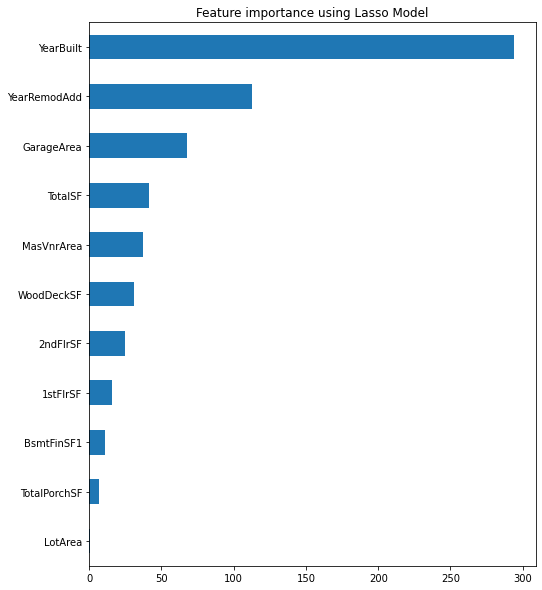

In [ ]:
# التخطيط البياني لأهم الخصائص
import matplotlib.pyplot as plt

imp_coef = coef[coef>0].sort_values()
import matplotlib
plt.figure(figsize=(8.0, 10.0))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
# اظهار البيانات
X[features_kept].head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,TotalSF,TotalPorchSF
0,8450,2003,2003,196.0,706,856,854,548,0,2566,61
1,9600,1976,1976,0.0,978,1262,0,460,298,2524,0
2,11250,2001,2002,162.0,486,920,866,608,0,2706,42
3,9550,1915,1970,0.0,216,961,756,642,0,2473,307
4,14260,2000,2000,350.0,655,1145,1053,836,192,3343,84


In [ ]:
# اضافة عمود الهدف
pd.concat([X[features_kept], y], axis=1).sample(3)

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,TotalSF,TotalPorchSF,SalePrice
1293,10140,1976,1976,0.0,194,832,832,528,0,2496,287,162900
856,10970,1978,1978,0.0,505,1026,0,576,0,1966,34,147000
696,6000,1921,1950,0.0,616,616,0,205,0,1232,129,89000


In [ ]:
pwd

'/content/drive/My Drive/ML-Course'

In [ ]:
# حفظ البيانات
pd.concat([X[features_kept], y], axis=1).to_csv("./data/features_kept1.csv")

In [ ]:
# تقسيم البيانات 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X[features_kept], y  ,test_size=.33, random_state=42)

In [ ]:
len("mot1 mot2 mot".split(" "))

3

In [ ]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest, chi2 
bestfeatures = SelectKBest(score_func=chi2, k=5)

In [ ]:
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: ignored

In [ ]:

# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=ols, step=1, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
rfecv.fit(X, y)

# Recursive feature elimination
rfecv.transform(X)